# Comparación de resultados: Netlogo vs Python

- Comparamos simulaciones con 1000 agentes en modo asynchronous-random-independent.
- Ring: Red Small-World con 2 vecinos y probabilidad de rewiring 0.
- Red Small-World con 4, 6, 8, 10, 20, 50, 100 vecinos y probabilidad de rewiring 0, 0.25, 0.5 y 1.

In [18]:
import random
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

from networkx.generators.random_graphs import binomial_graph, barabasi_albert_graph, connected_watts_strogatz_graph
from networkx.generators.geometric import navigable_small_world_graph
from scipy.integrate import odeint
from os import path as _path

%matplotlib inline

# Networks

# Ring

Small World Watts Strogatz con 2 vecinos y probabilidad de rewiring 0.

In [83]:
n_of_agents = 100

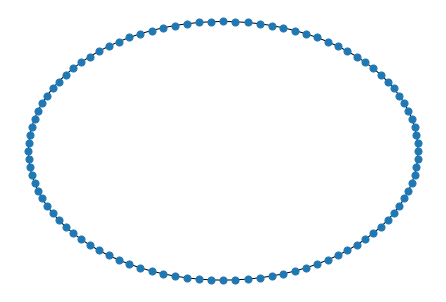

In [87]:
ring = connected_watts_strogatz_graph(n_of_agents, k=2, p=0)
nx.draw_circular(ring,  node_size=50)
plt.show()

## Barabasi-Albert

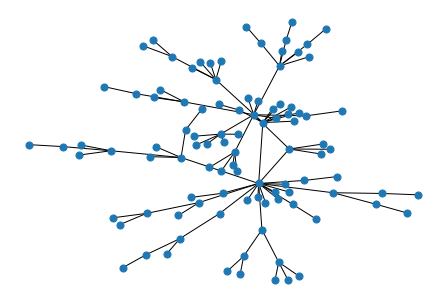

In [92]:
n_of_agents = 100
number_of_links = 1
pa = barabasi_albert_graph(n_of_agents, number_of_links)
nx.draw(pa, node_size=50)
plt.show()

# BEP

### Ring

In [101]:
ouputs_dir = "/home/javi/PycharmProjects/agent-based-model/workspace/outputs"

In [102]:
ring_file = "python_bep_5_strategies_100_runs_asynchronous_random_independent_1000_agents_0.0_noise_0.0_rewiring_sw_net_alg_2_neighbors.csv"

In [103]:
SW_NEIGHBORS_REWIRING = "python_bep_5_strategies_100_runs_asynchronous_random_independent_1000_agents_0.0_noise_{}_rewiring_sw_net_alg_{}_neighbors.csv"

In [104]:
ring = pd.read_csv(_path.join(ouputs_dir, ring_file), sep="|")

In [105]:
sw_ring = ring[ring["strategy_ratio"]==1.0].groupby("run_number", as_index=False).min()

In [106]:
sw_ring["network"] = "RING"

### Preferential Attachment 

In [107]:
pa_file = "python_bep_5_strategies_100_runs_asynchronous_random_independent_1000_agents_0.0_noise_1.0_rewiring_barabasi-albert_net_alg_0.2_prob_edge.csv"

In [108]:
pa = pd.read_csv(_path.join(ouputs_dir, pa_file), sep="|")

In [109]:
pa_net = pa[pa["strategy_ratio"]==1.0].groupby("run_number", as_index=False).min()

In [115]:
pa_net["network"] = "PA"

In [120]:
pa_net["neigbors"] = 0.2
sw_ring["neigbors"] = 0.2

In [121]:
first_hit_df = pd.concat([sw_ring, pa_net])

In [122]:
for k in [4, 6, 8, 10, 20, 50, 100]:
    for rewiring in [0.0, 0.25, 0.5, 1.0]:
        net = pd.read_csv(_path.join(ouputs_dir, SW_NEIGHBORS_REWIRING.format(rewiring, k)), sep="|")
        tmp_df = net[net["strategy_ratio"]==1.0].groupby("run_number", as_index=False).min()
        tmp_df["network"] = "sw_{}_{}".format(k, rewiring)
        tmp_df["neigbors"] = k / 100
        first_hit_df = pd.concat([first_hit_df, tmp_df])

In [123]:
first_hit_df.head()

,run_number,step,strategy_ratio,network,neigbors
0,0,93,1.0,RING,0.2
1,1,59,1.0,RING,0.2
2,2,55,1.0,RING,0.2
3,3,68,1.0,RING,0.2
4,4,76,1.0,RING,0.2


## Netlogo

<img src="netlogo_networks.png" alt="Drawing" style="width: 600px;"  align="left"/>

## Python

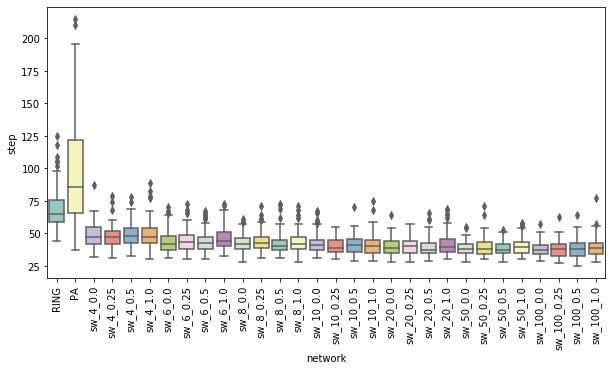

In [132]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="network", y="step", data=first_hit_df, palette="Set3")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)